In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import sys
sys.path.append("../scripts/")
from clean_data import DataCleaner
from utils import Utils

In [2]:
cleaner = DataCleaner()
util = Utils()

## EDA

In [3]:
df=util.load_data("../data/AdSmartABdata.csv")

In [15]:
df.shape

(8077, 9)

In [4]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [5]:
df.describe()


,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [7]:
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

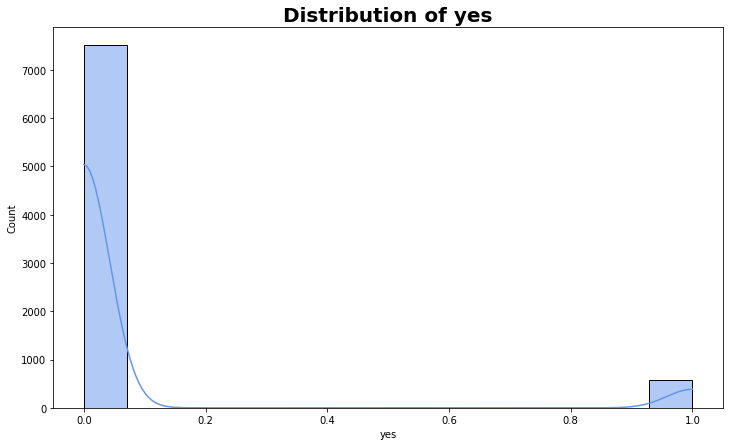

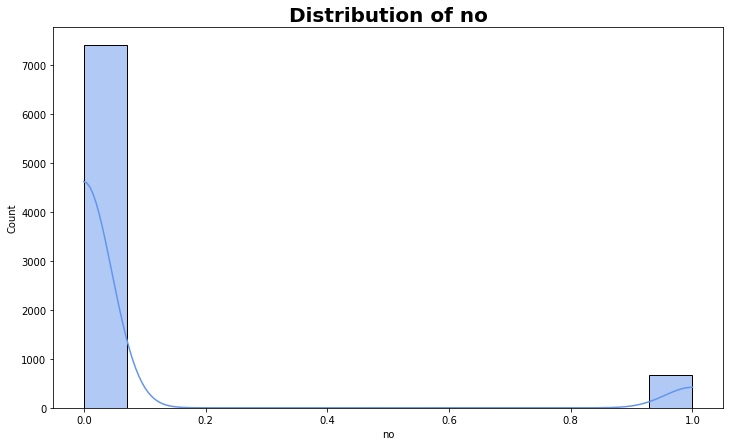

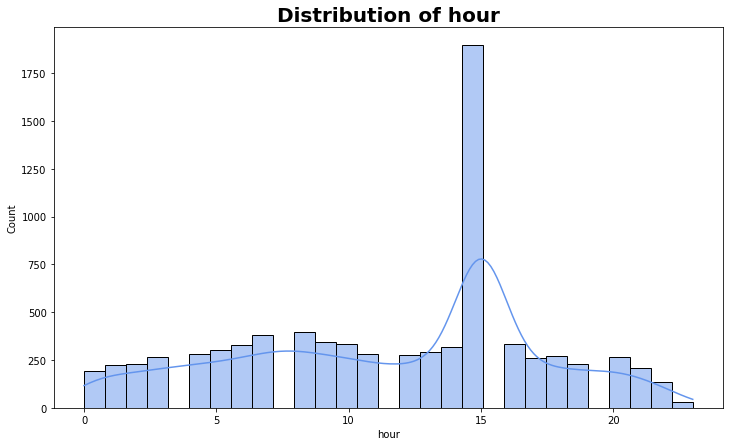

In [8]:
util.plot_hist(df,'yes','cornflowerblue')
util.plot_hist(df,'no','cornflowerblue')
util.plot_hist(df,'hour','cornflowerblue')

In [9]:
cleaner.get_categorical_columns(df)


['auction_id', 'experiment', 'date', 'device_make', 'browser']

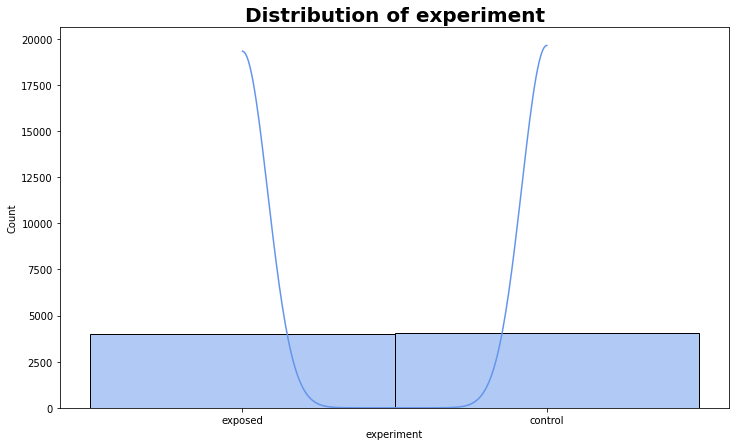

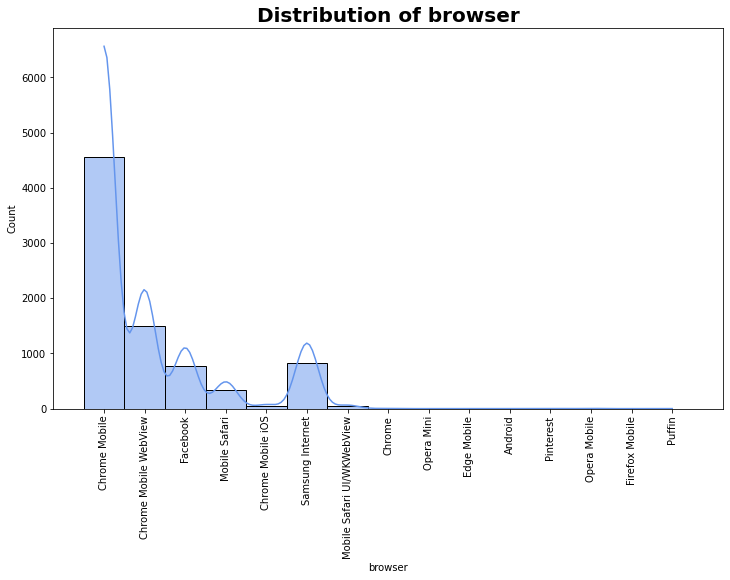

In [10]:
util.plot_hist(df,'experiment','cornflowerblue')
util.plot_hist(df,'browser','cornflowerblue',rot=90)


In [14]:
# if true we know each auction id is unique
len(df['auction_id'].unique())==df.shape[0]

True

In [12]:
# util.plot_hist(df,'device_make','cornflowerblue')
df_by_device=df.groupby('device_make').agg({"auction_id":"count"})
df_by_device

,auction_id
device_make,
5008Y_EEA,1
5099Y,1
6039Y,1
A0001,2
ALE-L21,1
...,...
XiaoMi Redmi S2,1
YAL-L21,3
iPhone,433


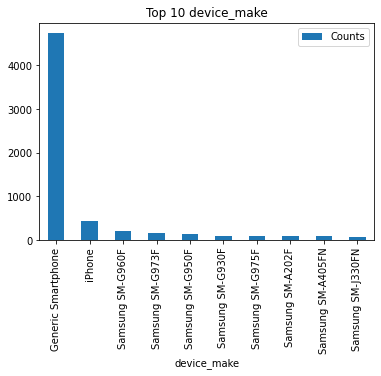

In [28]:
df_by_device.rename(columns={"auction_id":"Counts"},inplace=True)
df_by_device=df_by_device.sort_values(by=['Counts'],ascending=False)
df_by_device.head(10).plot(kind='bar',title="Top 10 device_make")
plt.show()

In [7]:
categorical_columns = cleaner.get_categorical_columns(df)

for col in categorical_columns:
    print(f"there are  {len(df[col].unique())} unique values {col}")



there are  8077 unique values auction_id
there are  2 unique values experiment
there are  8 unique values date
there are  270 unique values device_make
there are  15 unique values browser
